### NN - Part 2a
### Abed Tabbalat

In [ ]:
# Mounting drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras import layers, models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

## Importing Data

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Data Prep

In [ ]:
# Print the shape of each dataset to show the size of the data
print(f'train_images shape: {trainX.shape}')
print(f'test_images shape: {testX.shape}')
print(f'train_labels shape: {trainy.shape}')
print(f'test_labels shape: {testy.shape}')

train_images shape: (50000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)
train_labels shape: (50000, 1)
test_labels shape: (10000, 1)


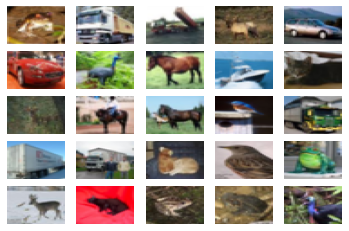

In [ ]:
# Assignment classes for visualization
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'frog', 'horse', 'ship', 'truck']

# Create a new figure and a 5x5 grid of subplots
fig, ax = plt.subplots(5, 5)

# Iterate through the subplots and display the images
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(trainX[k], aspect='auto')
        ax[i][j].axis('off')  # Hide axis for better visualization
        k += 1

# Display the plot
plt.show()

In [ ]:
# Normalize the pixel values of the image data by scaling them between 0 and 1
train_images = trainX.astype('float32') / 255.0
test_images = testX.astype('float32') / 255.0

# Convert the label data to one-hot encoded categorical format
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)

# Split the training data into partial training and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Print the shape of each dataset to show the size of the data
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'partial_x_train shape: {partial_x_train.shape}')
print(f'partial_y_train shape: {partial_y_train.shape}')

x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
partial_x_train shape: (40000, 32, 32, 3)
partial_y_train shape: (40000, 10)


## Model

In [ ]:
# Instantiate a convolutional neural network model
model = Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

# Add the second convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add a max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add the fourth convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add a max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add the fifth convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add the sixth convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add a max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add a flatten layer to convert the output of the convolutional layers to a 1D array
model.add(layers.Flatten())

# Add a fully connected layer with 128 neurons, ReLU activation, and kernel initialized with He uniform distribution
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Add the output layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# Define the optimizer with a learning rate of 0.001 and momentum of 0.9
opt = SGD(lr=0.001, momentum=0.9)

# Compile the model with categorical crossentropy loss, the defined optimizer, and accuracy metrics
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model with partial training and validation data for 30 epochs and a batch size of 64
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=30, batch_size=64,
                    validation_data=(x_val, y_val), verbose=1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
625/625 [==============================] - 359s 573ms/step - loss: 1.8126 - accuracy: 0.3480 - val_loss: 1.5360 - val_accuracy: 0.4523
Epoch 2/30
625/625 [==============================] - 355s 568ms/step - loss: 1.4559 - accuracy: 0.4816 - val_loss: 1.3405 - val_accuracy: 0.5165
Epoch 3/30
625/625 [==============================] - 351s 562ms/step - loss: 1.2920 - accuracy: 0.5393 - val_loss: 1.2515 - val_accuracy: 0.5582
Epoch 4/30
625/625 [==============================] - 351s 562ms/step - loss: 1.1718 - accuracy: 0.5858 - val_loss: 1.1691 - val_accuracy: 0.5807
Epoch 5/30
625/625 [==============================] - 350s 560ms/step - loss: 1.0656 - accuracy: 0.6254 - val_loss: 1.0588 - val_accuracy: 0.6288
Epoch 6/30
625/625 [==============================] - 349s 559ms/step - loss: 0.9793 - accuracy: 0.6586 - val_loss: 1.0095 - val_accuracy: 0.6445
Epoch 7/30
625/625 [==============================] - 351s 561ms/step - loss: 0.9004 - accuracy: 0.6887 - val_loss: 0.9796 -

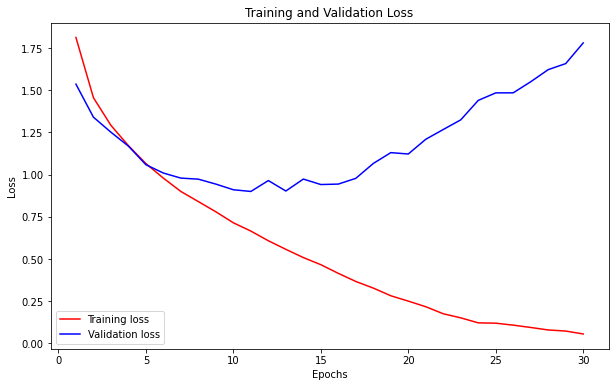

In [ ]:
# Create a figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Get the training and validation loss values from the history object
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Define the x-axis values as the range from 1 to the number of epochs + 1
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation loss curves
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

# Add a title and axis labels to the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend to the plot
plt.legend()

# Save the plot to a file and display it
fig = plt.gcf()
fig.savefig('results/CIFGAR10/excludes/train_val_loss.png')
plt.show()

<Figure size 432x288 with 0 Axes>

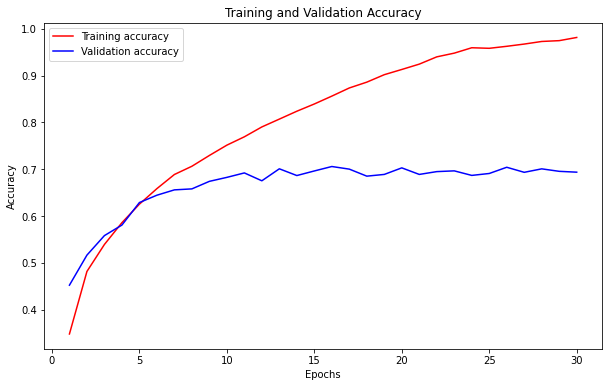

In [ ]:
# Clear the current figure
plt.clf()

# Create a figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Get the training and validation accuracy values from the history object
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

# Define the x-axis values as the range from 1 to the number of epochs + 1
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation accuracy curves
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')

# Add a title and axis labels to the plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend()

# Save the plot to a file and display it
fig = plt.gcf()
fig.savefig('results/CIFGAR10/excludes/train_val_accuracy.png')
plt.show()

In [ ]:
# Evaluate the trained model on the test data and obtain the test loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy and loss
print(f'Test accuracy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

313/313 [==============================] - 22s 70ms/step - loss: 1.8520 - accuracy: 0.6894
Test accuracy: 68.9%
Test loss: 1.852


In [ ]:
# Predict the labels of the test data using the trained model
label_pred_test = model.predict(test_images)

# Obtain the predicted classes with the highest probability for each sample in the test data
label_pred_test_classes = np.argmax(label_pred_test, axis=1)

# Obtain the highest probability of the predicted classes for each sample in the test data
label_pred_test_max_probability = np.max(label_pred_test, axis=1)

313/313 [==============================] - 23s 71ms/step


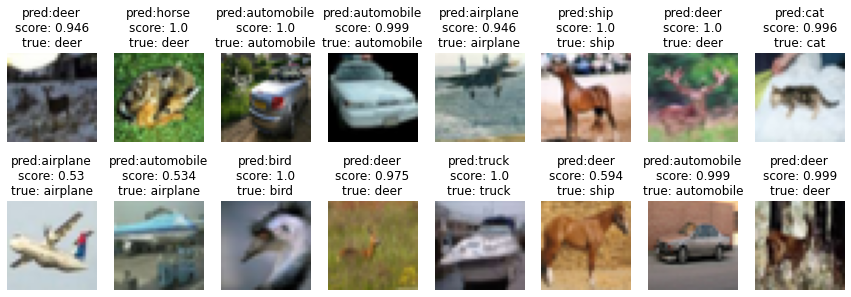

In [ ]:
cols = 8
rows = 2

fig = plt.figure(figsize = (2 * cols - 1, 3 * rows - 1))

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(test_labels))

    ax = fig.add_subplot(rows, cols, i * rows + j + 1)

    ax.grid('off')
    ax.axis('off')

    ax.imshow(test_images[random_index, :])

    pred_label = cifar10_classes[label_pred_test_classes[random_index]]
    pred_probability = label_pred_test_max_probability[random_index]

    true_label = cifar10_classes[test_labels[random_index]]

    ax.set_title(f'pred:{pred_label}\nscore: {pred_probability:.3}\ntrue: {true_label}')


In [ ]:
# Save the trained model and its training metrics to files
model.save('results/CIFGAR10/excludes/mnist.h5', history)

pickle.dump({'test_accuracy': test_acc, 
            'test_loss': test_loss, 
            'history_dict': history.history},
            open("results/CIFGAR10/excludes/training_metrics", "wb"))